In [ ]:
import os
os.chdir('drive/MyDrive/ToyotaKK')

In [ ]:
!ls

ACE_KW		BP_KWH.csv     GS_KW	      perday.csv	   sure_kw.csv	    VM_Perday.csv
ace_kw.csv	BP_Perday.csv  gs_kw.csv      ShowRoomKW	   SURE_KWH.csv
ACE_KWH.csv	EV_KW	       GS_KWH.csv     showroomkw.csv	   SURE_Perday.csv
ACE_Perday.csv	ev_kw.csv      GS_Perday.csv  ShowRoom_KWH.csv	   VM_KW
BP_KW		EV_KWH.csv     kw.csv	      ShowRoom_Perday.csv  vm_kw.csv
bp_kw.csv	EV_Perday.csv  kwh.csv	      SURE_KW		   VM_KWH.csv


In [ ]:
# pip install missingno

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import missingno

In [ ]:
def extract_datetime(df):

  df['Timestamp'] = pd.to_datetime(df['Timestamp'])

  df['weekday'] = df['Timestamp'].dt.day_name()
  df['dayofweek'] = df['Timestamp'].dt.dayofweek
  df['week'] = df['Timestamp'].dt.isocalendar().week
  df['month'] = df['Timestamp'].dt.month
  df['date'] = df['Timestamp'].dt.date
  df['time'] = df['Timestamp'].dt.time

  return df

# Perday

In [ ]:
perday = pd.read_csv('perday.csv')
perday.head()

,Timestamp,ACE_Perday,BP_Perday,EV_Perday,GS_Perday,SURE_Perday,ShowRoom_Perday,VM_Perday
0,18-Jul-23 3:30 PM ICT,24.0,14.5,-0.0,20.0,4.0,66.0,21.4
1,18-Jul-23 3:45 PM ICT,56.0,26.2,-0.0,35.2,6.2,107.6,27.2
2,18-Jul-23 4:00 PM ICT,80.0,80.7,-0.1,51.5,8.3,148.2,34.2
3,18-Jul-23 4:15 PM ICT,104.0,89.7,-0.1,67.2,10.5,188.6,40.6
4,18-Jul-23 4:30 PM ICT,112.3,100.5,-0.2,82.0,12.6,228.8,47.7


In [ ]:
missing = perday.isnull().sum().reset_index().rename(columns={0: 'count'})
missing['percent'] = round((missing['count']* 100 / len(perday)), 2)
missing

,index,count,percent
0,Timestamp,0,0.00
1,ACE_Perday,1,0.01
2,BP_Perday,193,1.26
3,EV_Perday,5,0.03
4,GS_Perday,193,1.26
5,SURE_Perday,6,0.04
6,ShowRoom_Perday,223,1.46
7,VM_Perday,103,0.67


<Axes: >

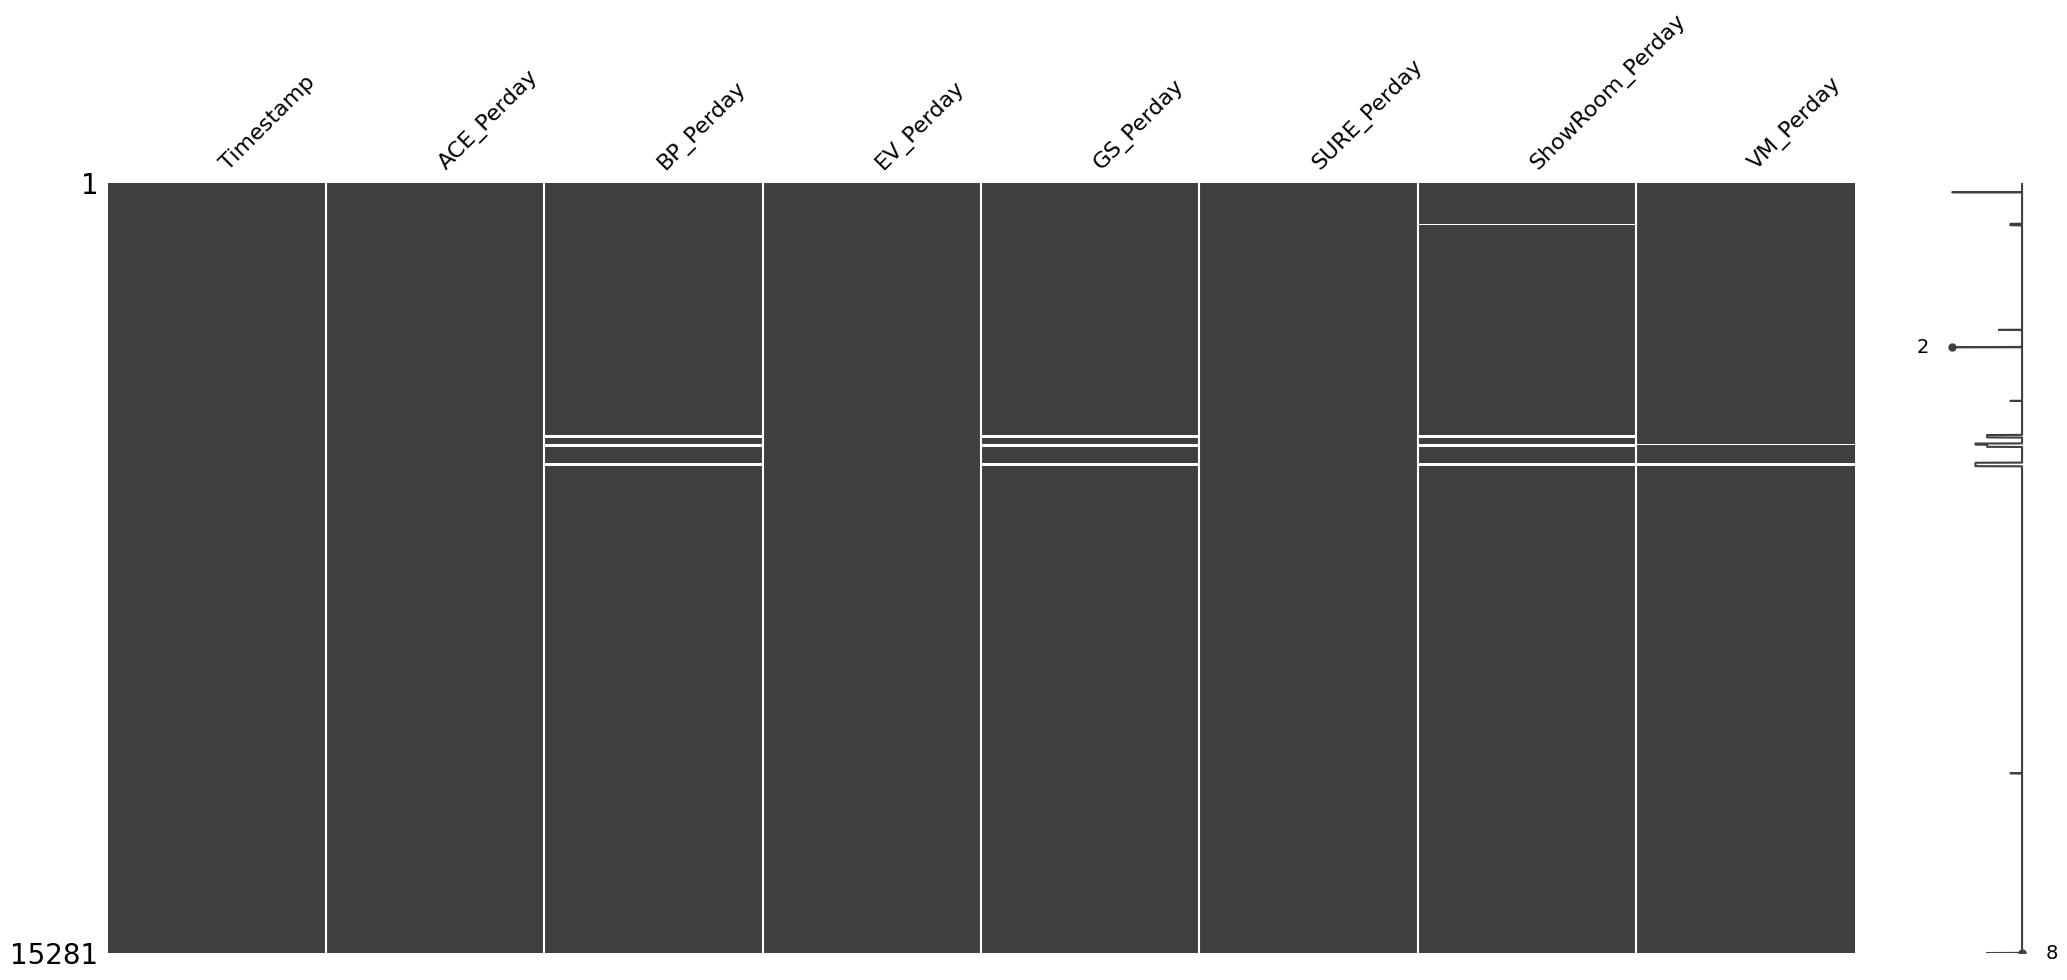

In [ ]:
missingno.matrix(perday)

In [ ]:
perday.head()

,Timestamp,ACE_Perday,BP_Perday,EV_Perday,GS_Perday,SURE_Perday,ShowRoom_Perday,VM_Perday
0,18-Jul-23 3:30 PM ICT,24.0,14.5,-0.0,20.0,4.0,66.0,21.4
1,18-Jul-23 3:45 PM ICT,56.0,26.2,-0.0,35.2,6.2,107.6,27.2
2,18-Jul-23 4:00 PM ICT,80.0,80.7,-0.1,51.5,8.3,148.2,34.2
3,18-Jul-23 4:15 PM ICT,104.0,89.7,-0.1,67.2,10.5,188.6,40.6
4,18-Jul-23 4:30 PM ICT,112.3,100.5,-0.2,82.0,12.6,228.8,47.7


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

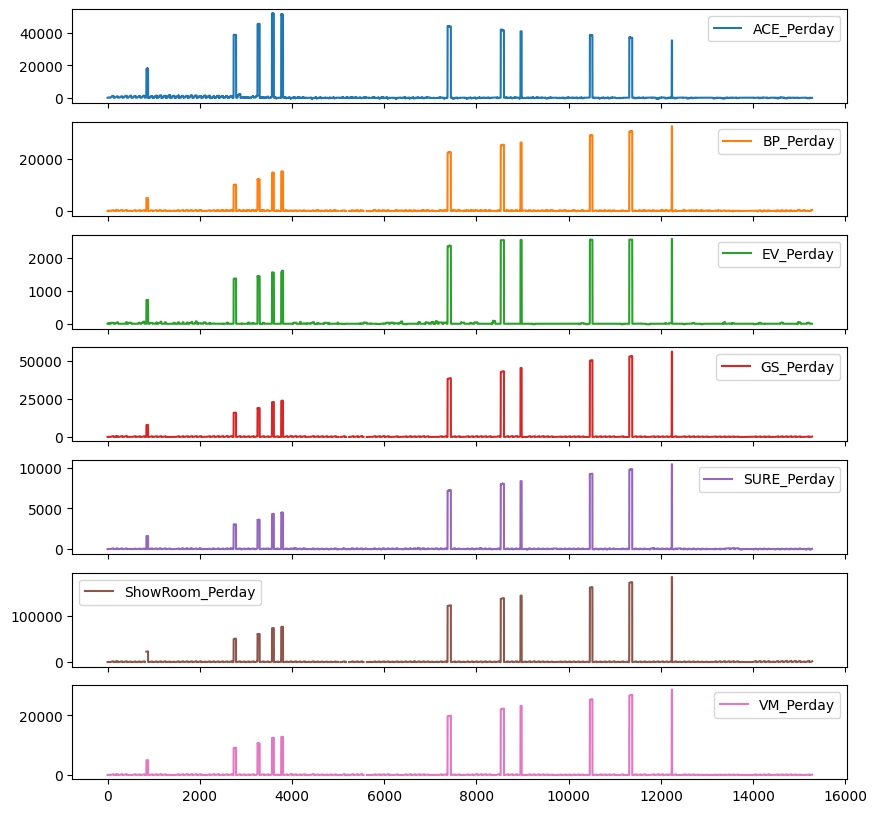

In [ ]:
perday[perday.columns[1:]].plot(subplots=True, sharex=True, figsize = (10,10))

In [ ]:
perday_long = pd.melt(
    perday, id_vars='Timestamp', value_vars=perday.columns[1:8],
    var_name='site', value_name='kWH'
    )

perday_long = extract_datetime(perday_long)
perday_long.head()

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ICT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Timestamp,site,kWH,weekday,dayofweek,week,month,date,time
0,2023-07-18 15:30:00,ACE_Perday,24.0,Tuesday,1,29,7,2023-07-18,15:30:00
1,2023-07-18 15:45:00,ACE_Perday,56.0,Tuesday,1,29,7,2023-07-18,15:45:00
2,2023-07-18 16:00:00,ACE_Perday,80.0,Tuesday,1,29,7,2023-07-18,16:00:00
3,2023-07-18 16:15:00,ACE_Perday,104.0,Tuesday,1,29,7,2023-07-18,16:15:00
4,2023-07-18 16:30:00,ACE_Perday,112.3,Tuesday,1,29,7,2023-07-18,16:30:00


In [ ]:
fig = px.line(perday_long, x='Timestamp', y='kWH', color='site')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig = px.line(perday_long, x='Timestamp', y='kWH', color='site', log_y=True)
fig.update_traces(opacity=0.4)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
perday['Timestamp'] = pd.to_datetime(perday['Timestamp'])
perday_day = perday.set_index('Timestamp').resample('1D').max().reset_index()
perday_day.head()

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning:

tzname ICT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



,Timestamp,ACE_Perday,BP_Perday,EV_Perday,GS_Perday,SURE_Perday,ShowRoom_Perday,VM_Perday
0,2023-07-18,153.9,117.9,24.7,125.1,21.9,417.4,75.5
1,2023-07-19,1102.5,310.3,28.6,510.8,83.9,1664.6,232.4
2,2023-07-20,1086.7,329.2,44.6,511.5,84.1,1676.3,236.9
3,2023-07-21,864.6,364.5,44.6,526.4,87.0,1678.5,239.9
4,2023-07-22,1185.8,359.2,48.2,590.3,87.4,1667.3,289.7


In [ ]:
perday_day.describe()

,ACE_Perday,BP_Perday,EV_Perday,GS_Perday,SURE_Perday,ShowRoom_Perday,VM_Perday
count,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,5750.731098,2948.22622,288.267683,4937.531707,924.080488,15929.750610,2571.998780
std,14118.603471,7574.74029,712.638796,12937.338605,2406.723202,41623.368764,6655.082397
min,1.200000,6.30000,0.600000,36.600000,17.800000,296.800000,30.600000
25%,61.975000,232.12500,1.900000,373.425000,68.700000,1282.750000,185.500000
50%,169.550000,278.95000,28.800000,434.700000,81.200000,1426.050000,223.150000
75%,1195.550000,335.07500,49.500000,521.925000,90.700000,1723.775000,272.525000
max,52222.600000,32427.60000,2587.800000,55993.900000,10420.500000,183542.500000,28603.400000


In [ ]:
perday_day_long = pd.melt(
    perday_day, id_vars='Timestamp', value_vars=perday_day.columns[1:8],
    var_name='site', value_name='kWH'
    )

perday_day_long = extract_datetime(perday_day_long)
perday_day_long.head()

,Timestamp,site,kWH,weekday,dayofweek,week,month,date,time
0,2023-07-18,ACE_Perday,153.9,Tuesday,1,29,7,2023-07-18,00:00:00
1,2023-07-19,ACE_Perday,1102.5,Wednesday,2,29,7,2023-07-19,00:00:00
2,2023-07-20,ACE_Perday,1086.7,Thursday,3,29,7,2023-07-20,00:00:00
3,2023-07-21,ACE_Perday,864.6,Friday,4,29,7,2023-07-21,00:00:00
4,2023-07-22,ACE_Perday,1185.8,Saturday,5,29,7,2023-07-22,00:00:00


<Axes: xlabel='kWH', ylabel='site'>

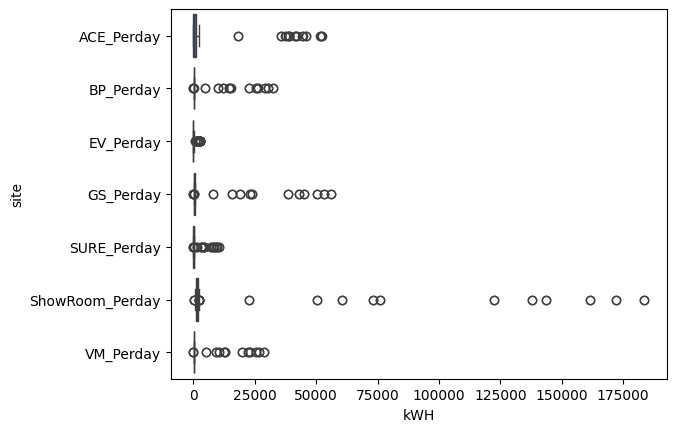

In [ ]:
sns.boxplot(data=perday_day_long, x='kWH', y='site')

In [ ]:
fig = px.line(perday_day_long, x='Timestamp', y='kWH', color='site')
fig.show()

In [ ]:
fig = px.line(perday_day_long, x='Timestamp', y='kWH', color='site', log_y=True)
fig.show()

# kWH

In [ ]:
kwh = pd.read_csv('kwh.csv')
kwh.head()

,Timestamp,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
0,18-Jul-23 2:45 PM ICT,230.4,1.1,727.9,299.9,1228.8,1469.6,913.5
1,18-Jul-23 3:00 PM ICT,239.9,1.1,741.6,302.6,1243.8,1485.6,953.7
2,18-Jul-23 3:15 PM ICT,248.0,1.0,754.7,305.3,1259.2,1501.6,994.6
3,18-Jul-23 3:30 PM ICT,258.8,1.0,769.5,308.2,1275.4,1525.6,1037.1
4,18-Jul-23 3:45 PM ICT,270.4,1.0,784.8,310.4,1281.3,1557.6,1078.7


In [ ]:
kwh.tail()

,Timestamp,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
15280,16-Jan-24 2:45 PM ICT,37349.1,2794.8,64331.9,12069.3,32910.0,31827.1,NaN
15281,16-Jan-24 3:00 PM ICT,37355.8,2794.8,64341.6,12072.2,32914.1,31834.2,NaN
15282,16-Jan-24 3:15 PM ICT,37362.8,2794.9,64351.5,12074.1,32918.0,31842.0,NaN
15283,16-Jan-24 3:30 PM ICT,37368.2,2795.1,64361.0,12075.7,32921.6,31849.8,NaN
15284,16-Jan-24 3:45 PM ICT,37373.1,2795.1,64371.8,12076.9,32924.9,NaN,NaN


In [ ]:
len(kwh)

15285

In [ ]:
missing = kwh.isnull().sum().reset_index().rename(columns={0: 'count'})
missing['percent'] = round((missing['count']* 100 / len(kwh)), 2)
missing

,index,count,percent
0,Timestamp,0,0.00
1,BP_KWH,0,0.00
2,EV_KWH,0,0.00
3,GS_KWH,0,0.00
4,SURE_KWH,0,0.00
5,VM_KWH,0,0.00
6,ACE_KWH,1,0.01
7,ShowRoom_KWH,59,0.39


In [ ]:
# calculate kwh according to meter structure
kwh['ShowRoom_KWH'] = kwh['ShowRoom_KWH'] - kwh['EV_KWH'] - kwh['SURE_KWH']
kwh['BP_KWH'] = kwh['BP_KWH'] - kwh['VM_KWH']
kwh.head()

,Timestamp,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
0,18-Jul-23 2:45 PM ICT,-998.4,1.1,727.9,299.9,1228.8,1469.6,612.5
1,18-Jul-23 3:00 PM ICT,-1003.9,1.1,741.6,302.6,1243.8,1485.6,650.0
2,18-Jul-23 3:15 PM ICT,-1011.2,1.0,754.7,305.3,1259.2,1501.6,688.3
3,18-Jul-23 3:30 PM ICT,-1016.6,1.0,769.5,308.2,1275.4,1525.6,727.9
4,18-Jul-23 3:45 PM ICT,-1010.9,1.0,784.8,310.4,1281.3,1557.6,767.3


In [ ]:
kwh = extract_datetime(kwh)
kwh.head()

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ICT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,Timestamp,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH,weekday,dayofweek,week,month,date,time
0,2023-07-18 14:45:00,-998.4,1.1,727.9,299.9,1228.8,1469.6,612.5,Tuesday,1,29,7,2023-07-18,14:45:00
1,2023-07-18 15:00:00,-1003.9,1.1,741.6,302.6,1243.8,1485.6,650.0,Tuesday,1,29,7,2023-07-18,15:00:00
2,2023-07-18 15:15:00,-1011.2,1.0,754.7,305.3,1259.2,1501.6,688.3,Tuesday,1,29,7,2023-07-18,15:15:00
3,2023-07-18 15:30:00,-1016.6,1.0,769.5,308.2,1275.4,1525.6,727.9,Tuesday,1,29,7,2023-07-18,15:30:00
4,2023-07-18 15:45:00,-1010.9,1.0,784.8,310.4,1281.3,1557.6,767.3,Tuesday,1,29,7,2023-07-18,15:45:00


In [ ]:
kwh_long = pd.melt(
    kwh, id_vars='Timestamp', value_vars=kwh.columns[1:8],
    var_name='site', value_name='kWH'
    )

kwh_long = extract_datetime(kwh_long)
kwh_long.head()

,Timestamp,site,kWH,weekday,dayofweek,week,month,date,time
0,2023-07-18 14:45:00,BP_KWH,-998.4,Tuesday,1,29,7,2023-07-18,14:45:00
1,2023-07-18 15:00:00,BP_KWH,-1003.9,Tuesday,1,29,7,2023-07-18,15:00:00
2,2023-07-18 15:15:00,BP_KWH,-1011.2,Tuesday,1,29,7,2023-07-18,15:15:00
3,2023-07-18 15:30:00,BP_KWH,-1016.6,Tuesday,1,29,7,2023-07-18,15:30:00
4,2023-07-18 15:45:00,BP_KWH,-1010.9,Tuesday,1,29,7,2023-07-18,15:45:00


In [ ]:
fig = px.line(kwh_long, x='Timestamp', y='kWH', color='site')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
kwh_perday = kwh.set_index('Timestamp').resample('1D').max()
kwh_perday = kwh_perday[kwh_perday.columns[:7]].diff().reset_index()
kwh_perday

,Timestamp,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
0,2023-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-19,74.7,28.5,511.5,84.1,232.9,1096.0,1554.7
2,2023-07-20,95.1,44.2,489.2,80.8,237.5,830.8,1554.0
3,2023-07-21,112.1,0.5,527.0,87.3,240.5,863.7,1465.6
4,2023-07-22,70.8,47.7,590.9,87.5,290.2,1180.0,1534.0
...,...,...,...,...,...,...,...,...
178,2024-01-12,49.7,1.6,357.6,55.5,170.6,-127.3,2365.4
179,2024-01-13,80.9,47.6,315.9,72.0,151.2,-127.1,2226.5
180,2024-01-14,42.2,-4.4,45.4,24.0,33.0,-139.5,1200.4
181,2024-01-15,18.1,31.0,340.2,65.1,180.0,9.5,2296.0


In [ ]:
#kwh_perday.to_csv('kwh_perday.csv', index=False)

In [ ]:
kwh_perday = pd.read_csv('kwh_perday.csv')
kwh_perday.head()

,Timestamp,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
0,2023-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-19,74.7,28.5,511.5,84.1,232.9,1096.0,1554.7
2,2023-07-20,95.1,44.2,489.2,80.8,237.5,830.8,1554.0
3,2023-07-21,112.1,0.5,527.0,87.3,240.5,863.7,1465.6
4,2023-07-22,70.8,47.7,590.9,87.5,290.2,1180.0,1534.0


In [ ]:
kwh_perday_long = pd.melt(
    kwh_perday, id_vars='Timestamp', value_vars=kwh_perday.columns[1:],
    var_name='site', value_name='kWH'
    )

fig = px.line(kwh_perday_long, x='Timestamp', y='kWH', color='site')
fig.show()

In [ ]:
def plot_dayofweek(df, col_name):

  df = extract_datetime(df)

  df_pivot = df.pivot_table(col_name, index=df.dayofweek, columns=df.week)
  df_pivot.plot(legend=False, alpha=0.2)

In [ ]:
kwh_perday.head()

,Timestamp,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
0,2023-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-07-19,74.7,28.5,511.5,84.1,232.9,1096.0,1554.7
2,2023-07-20,95.1,44.2,489.2,80.8,237.5,830.8,1554.0
3,2023-07-21,112.1,0.5,527.0,87.3,240.5,863.7,1465.6
4,2023-07-22,70.8,47.7,590.9,87.5,290.2,1180.0,1534.0


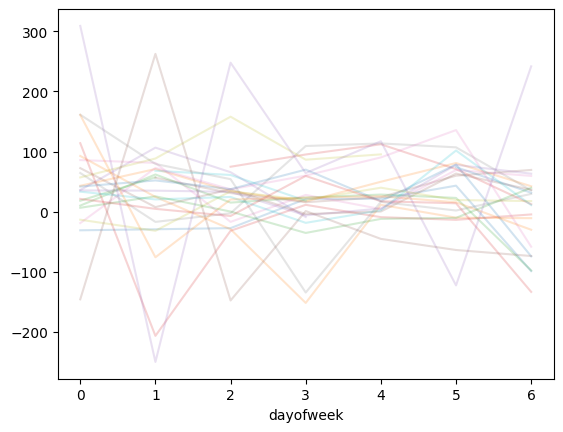

In [ ]:
plot_dayofweek(kwh_perday, 'BP_KWH')

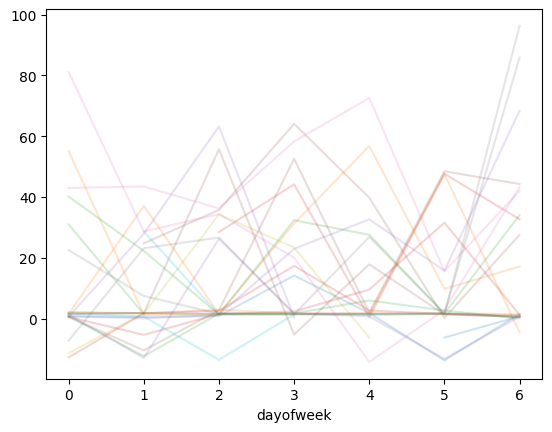

In [ ]:
plot_dayofweek(kwh_perday, 'EV_KWH')

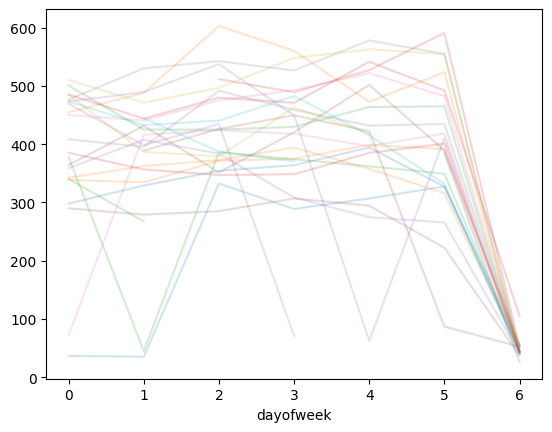

In [ ]:
plot_dayofweek(kwh_perday, 'GS_KWH')
# the trends of each week are relatively consistent compared to other week
# energy usage always drop on sunday

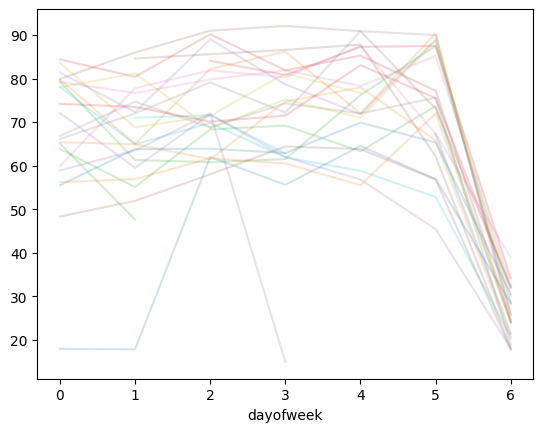

In [ ]:
plot_dayofweek(kwh_perday, 'SURE_KWH')

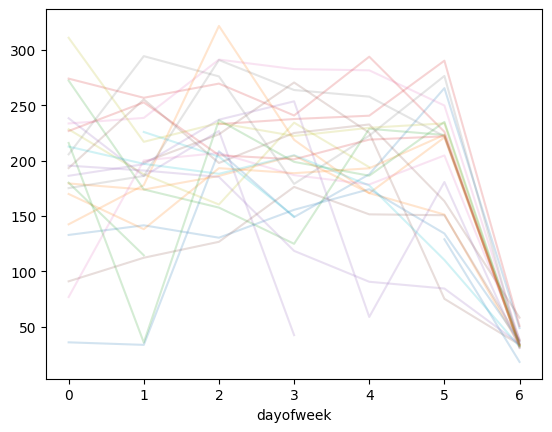

In [ ]:
plot_dayofweek(kwh_perday, 'VM_KWH')

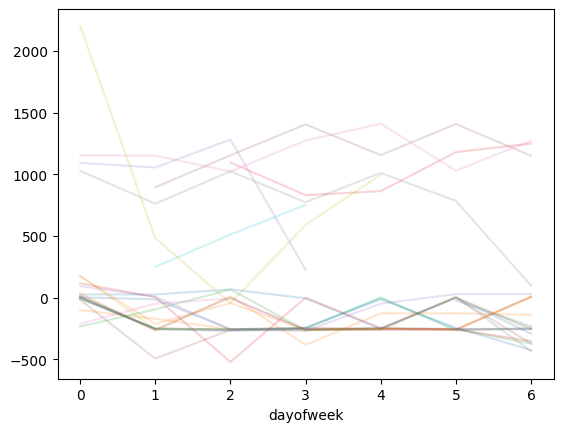

In [ ]:
plot_dayofweek(kwh_perday, 'ACE_KWH')

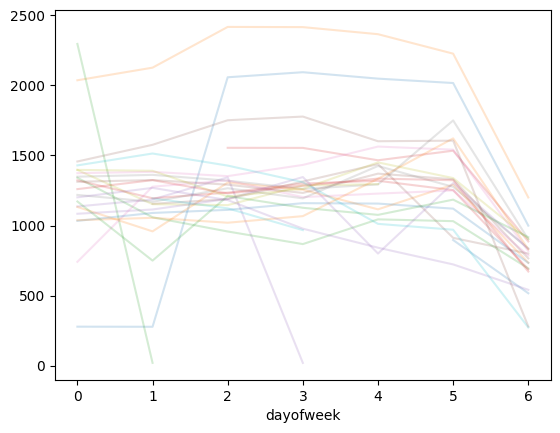

In [ ]:
plot_dayofweek(kwh_perday, 'ShowRoom_KWH')

## Seasonality

In [ ]:
def plot_seasonal(col_name):
  s = kwh_perday.set_index('Timestamp')[col_name].fillna(method='ffill').sort_index().dropna()
  result = seasonal_decompose(s, model='additive',)

  fig = result.plot()
  fig.set_size_inches((12, 5))
  fig.tight_layout()
  plt.show()

In [ ]:
def plot_autocorr(col_name):

  s = kwh_perday.set_index('Timestamp')[col_name].fillna(method='ffill').sort_index().dropna()

  fig,axs = plt.subplots(1, 2)

  plot_acf(s, ax=axs[0])
  plot_pacf(s, ax=axs[1])

  fig.set_size_inches((12, 5))
  fig.tight_layout()
  plt.show()

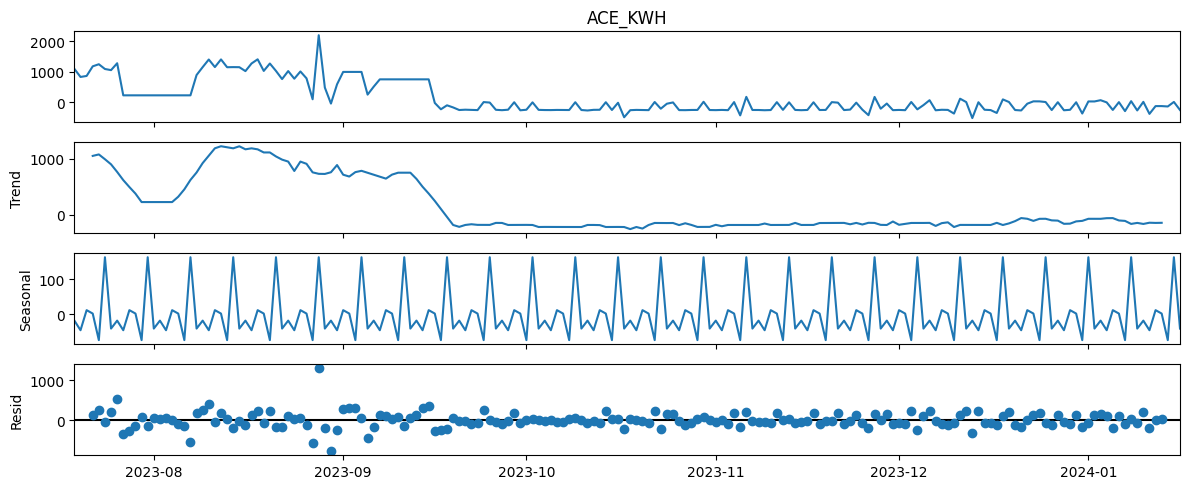

In [ ]:
plot_seasonal('ACE_KWH')

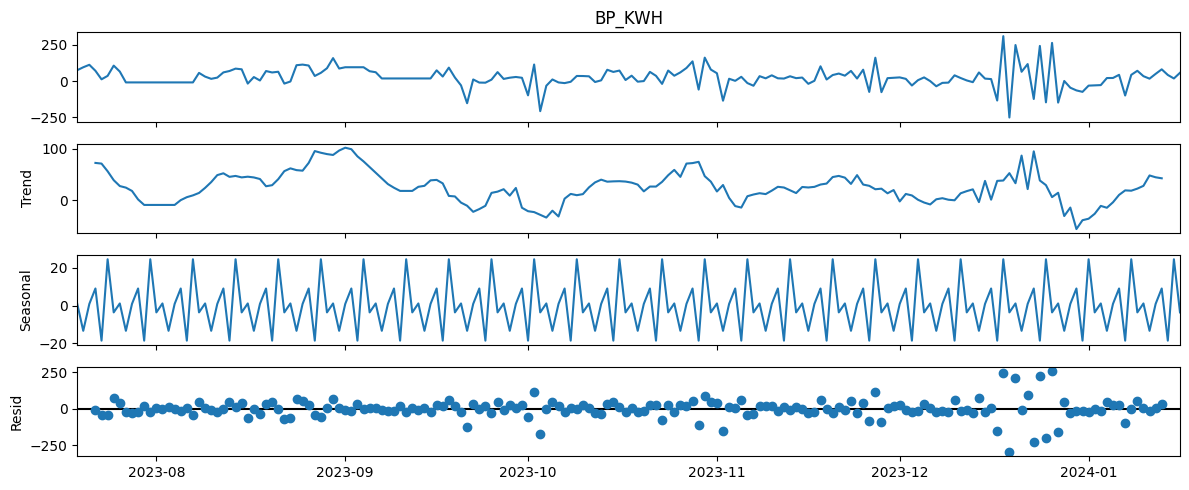

In [ ]:
plot_seasonal('BP_KWH')

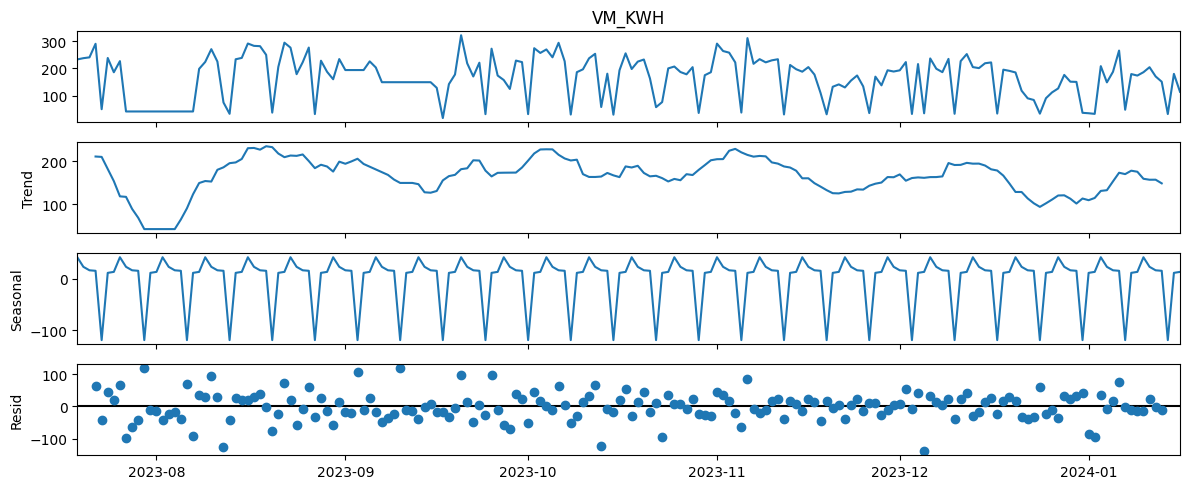

In [ ]:
plot_seasonal('VM_KWH')

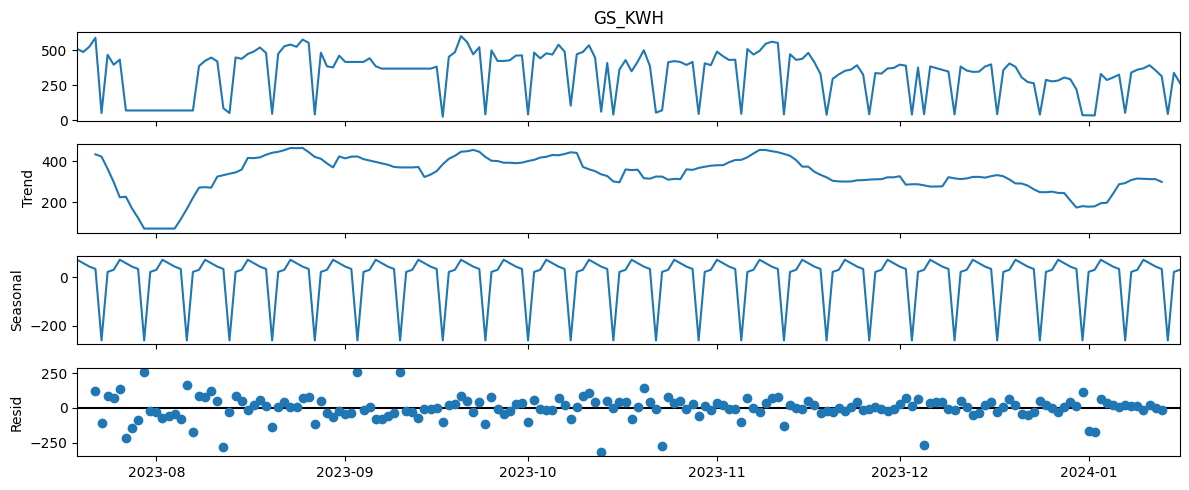

In [ ]:
plot_seasonal('GS_KWH')

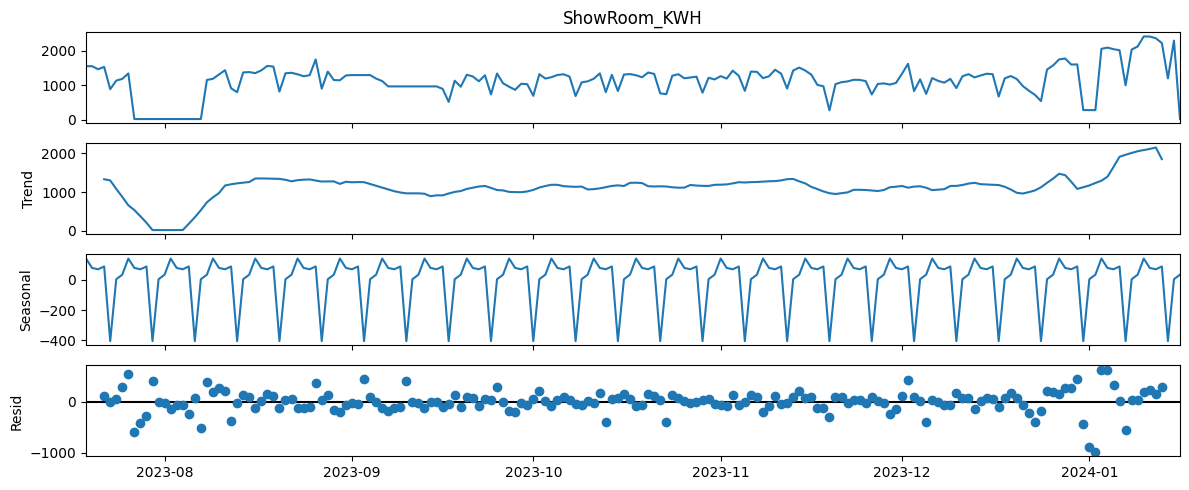

In [ ]:
plot_seasonal('ShowRoom_KWH')

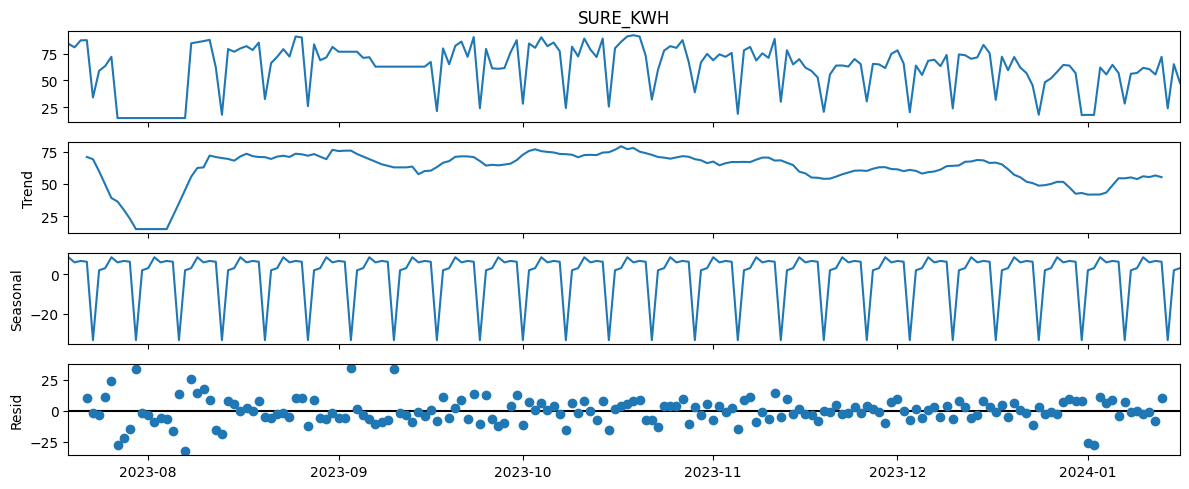

In [ ]:
plot_seasonal('SURE_KWH')

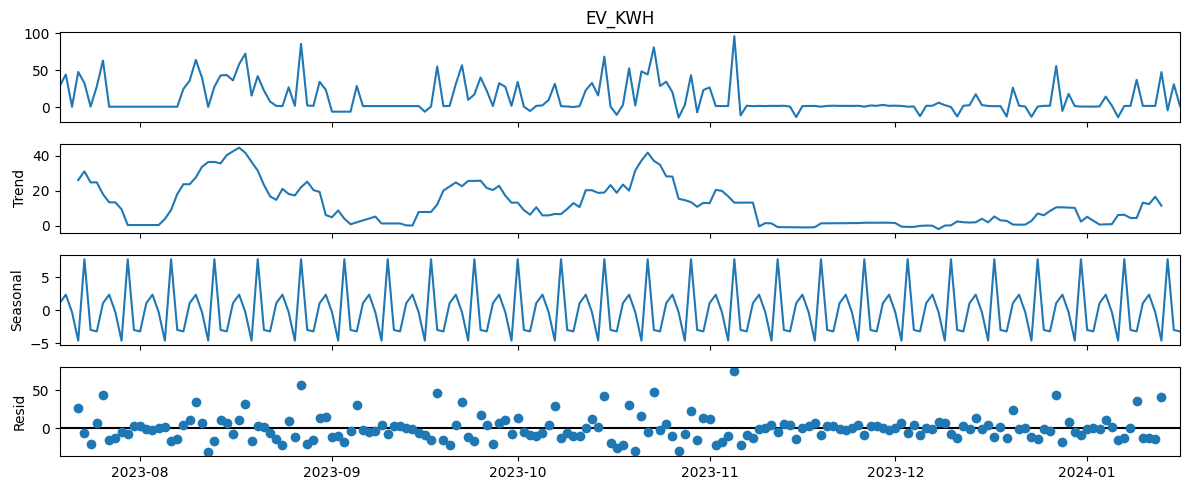

In [ ]:
plot_seasonal('EV_KWH')

## Fourier Transform

In [ ]:
import scipy.fft

In [ ]:
# Get the frequency components of the spectrum
sampling_rate = 200.0 # It's used as a sample spacing
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(fourier)/normalize
# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

NameError: name 'fftfreq' is not defined

Text(0, 0.5, 'amplitude [a.u.]')

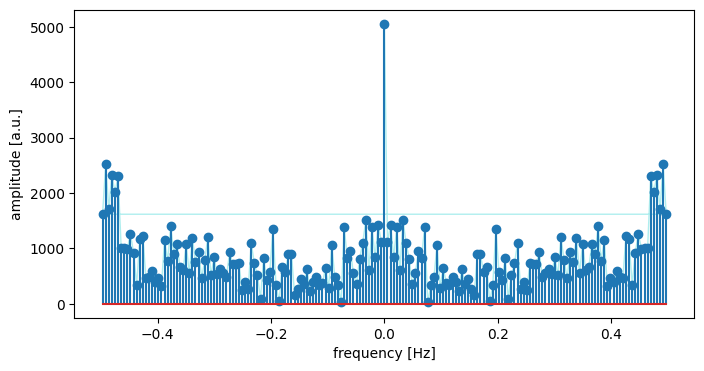

In [ ]:
t = list(range(len(kwh_perday['Timestamp'])))

signal_fft = scipy.fft.fft(kwh_perday['BP_KWH'].fillna(kwh_perday['BP_KWH'].mean()).values)
frequencies = scipy.fft.fftfreq(np.size(t))
num=np.size(x)
freq = [i / num for i in list(range(num))]

fig=plt.figure(2, figsize=(8,4))
plt.clf()
plt.plot(frequencies, np.abs(signal_fft), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(signal_fft))
plt.xlabel("frequency (day)")
plt.ylabel("amplitude [a.u.]")
#plt.title(r"$|\mathcal{F}(A_{signal})|$")

## Autocorrelation

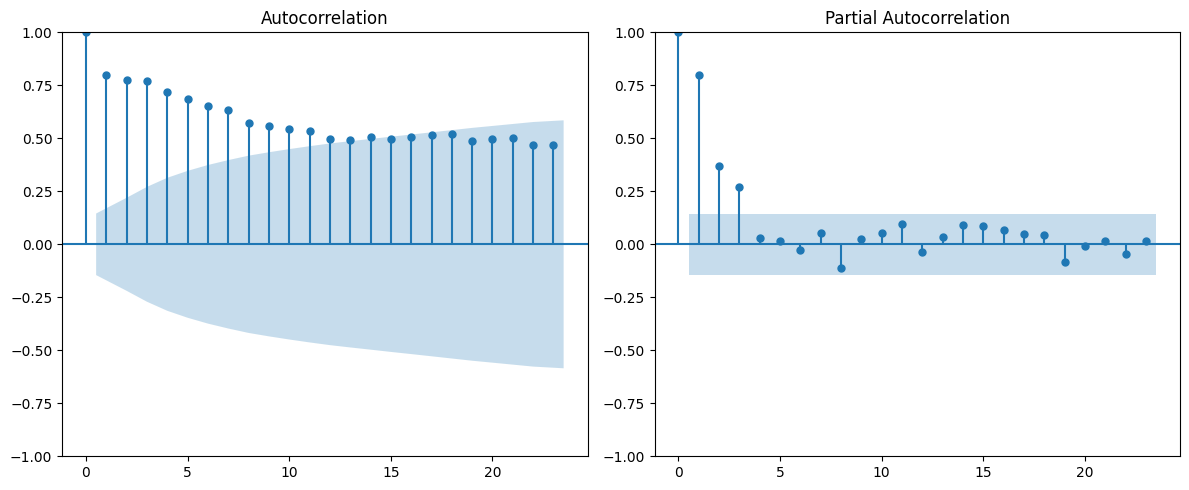

In [ ]:
plot_autocorr('ACE_KWH')

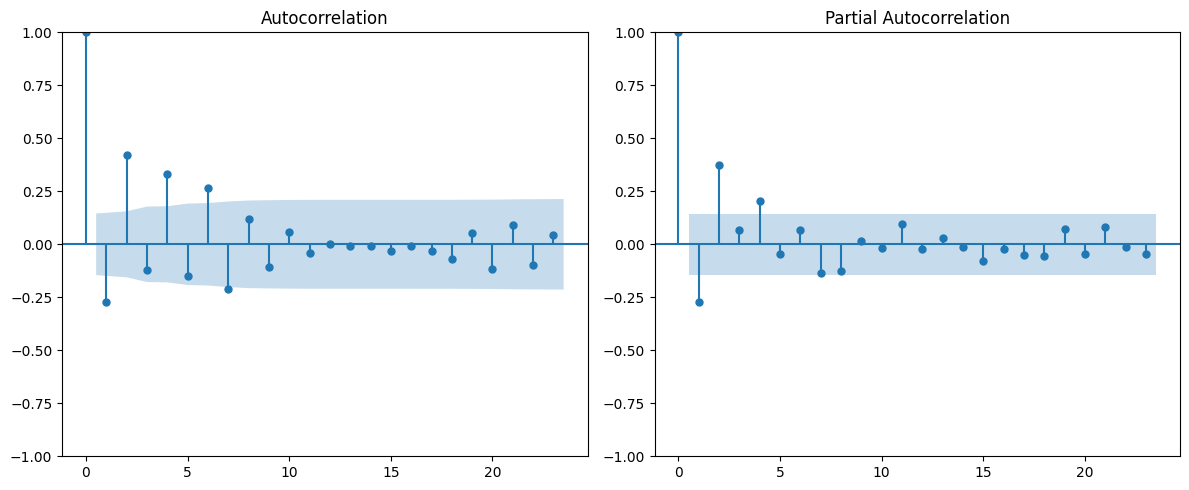

In [ ]:
plot_autocorr('BP_KWH')

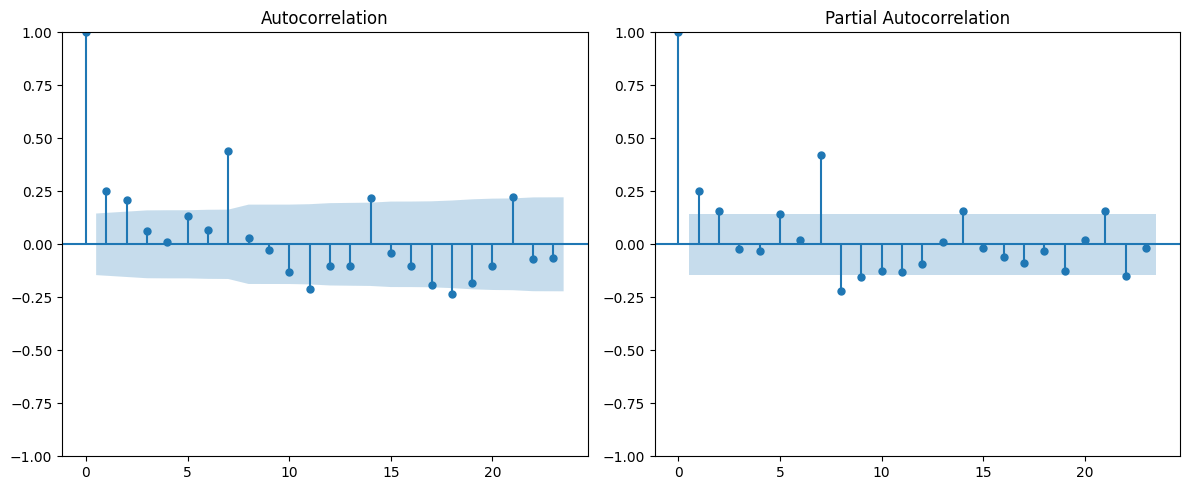

In [ ]:
plot_autocorr('VM_KWH')

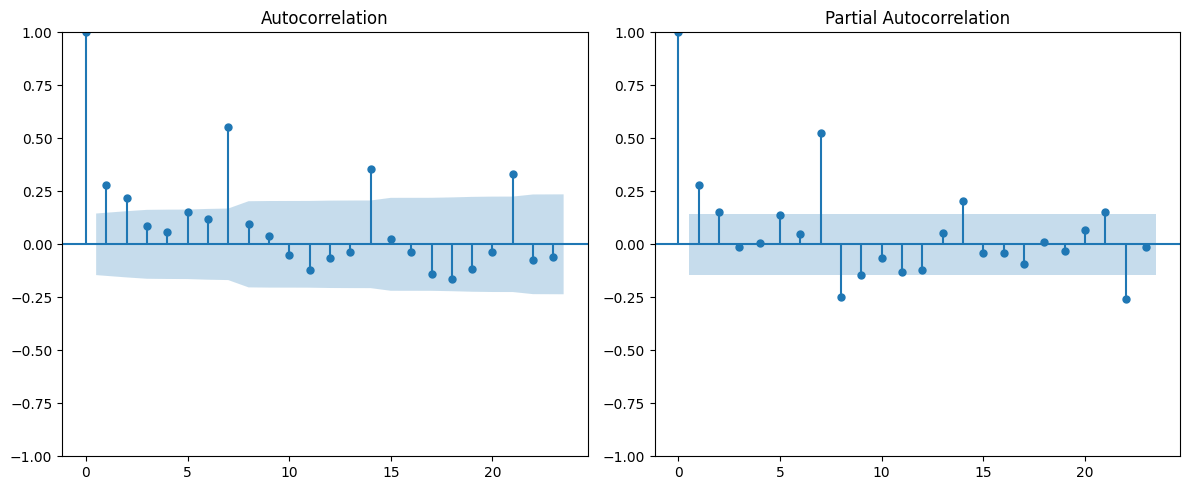

In [ ]:
plot_autocorr('GS_KWH')

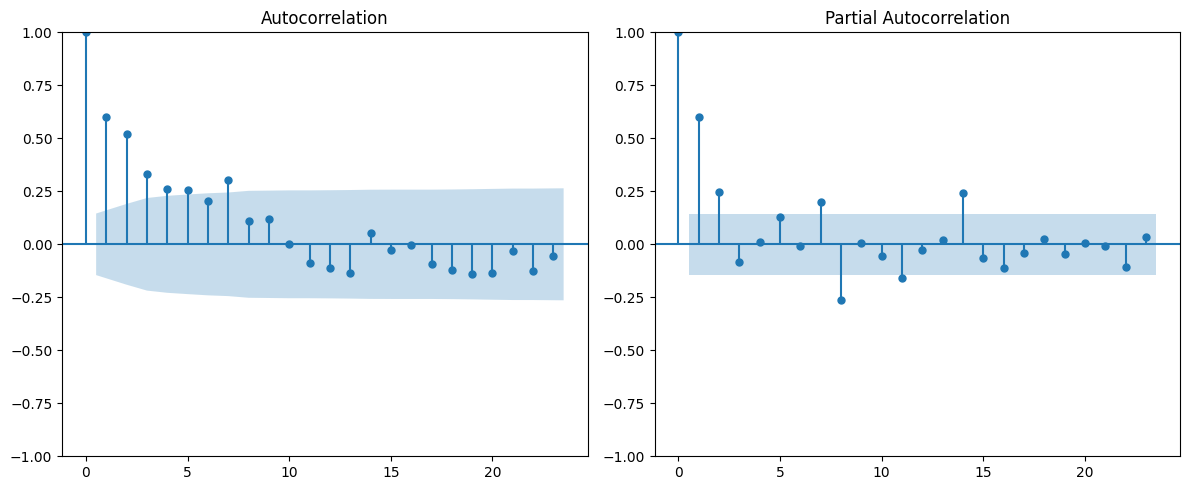

In [ ]:
plot_autocorr('ShowRoom_KWH')

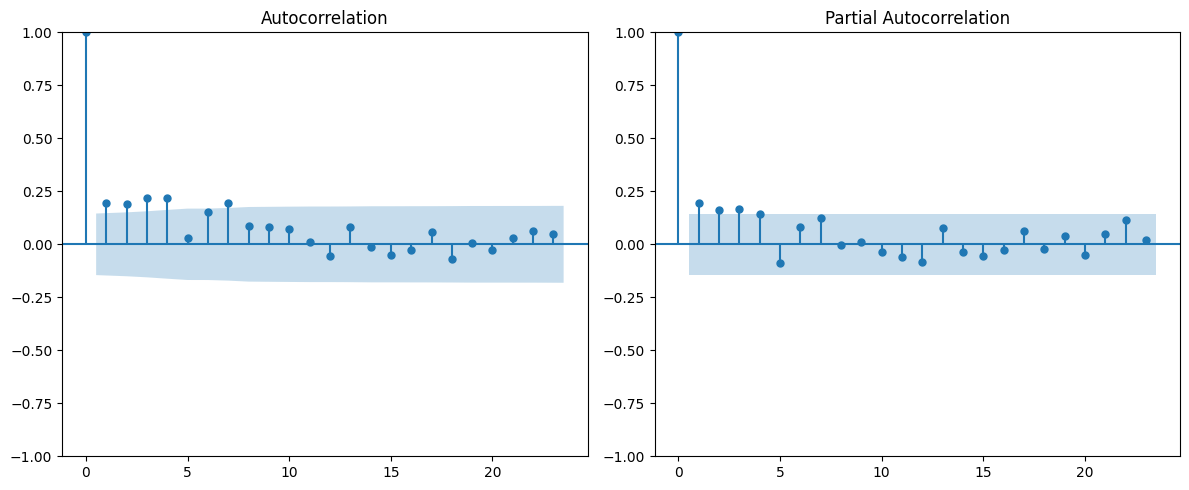

In [ ]:
plot_autocorr('EV_KWH')

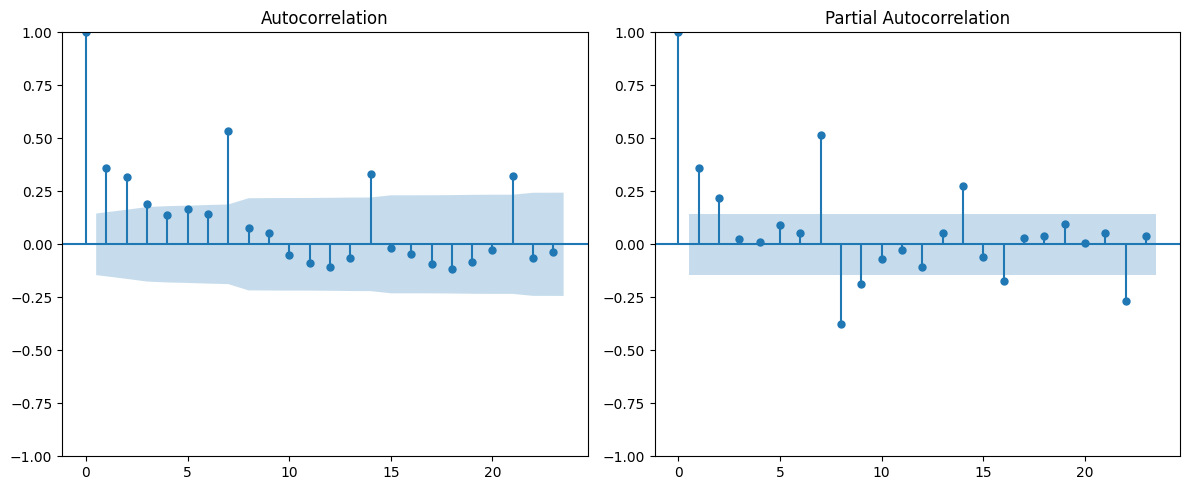

In [ ]:
plot_autocorr('SURE_KWH')

## Stationary test

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests

In [ ]:
def adf_test(df):

    test_stat, p_val = [], []
    cv_1pct, cv_5pct, cv_10pct = [], [], []
    for col in df.columns:
        adf_res = adfuller(df[col].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1])
        cv_1pct.append(adf_res[4]['1%'])
        cv_5pct.append(adf_res[4]['5%'])
        cv_10pct.append(adf_res[4]['10%'])
    adf_res = pd.DataFrame({'test_stat': test_stat,
                               'p-value': p_val,
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct},
                             index=df.columns)

    adf_res['stationary'] = np.where((adf_res['test_stat']<adf_res['Critical value - 5%'])&(adf_res['p-value']<=0.05), 'yes', 'no')
    adf_res = adf_res.T.round(4)

    return adf_res

# The p-value obtained is greater than the significance level of 0.05, and the ADF statistic is higher than any of the critical values.
# There is no reason to reject the null hypothesis. So, the time series is, in fact, non-stationary.

In [ ]:
adf_test(kwh_perday.iloc[:, 1:])

,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
test_stat,-4.350789,-2.696709,-1.733474,-1.178615,-2.65112,-1.865382,-0.682903
p-value,0.000362,0.07461,0.413953,0.682727,0.082885,0.348517,0.851129
Critical value - 1%,-3.472979,-3.47383,-3.475953,-3.475953,-3.47383,-3.472979,-3.475953
Critical value - 5%,-2.880252,-2.880623,-2.881548,-2.881548,-2.880623,-2.880252,-2.881548
Critical value - 10%,-2.576747,-2.576945,-2.577439,-2.577439,-2.576945,-2.576747,-2.577439
stationary,yes,no,no,no,no,no,no


In [ ]:
def kpss_test(df):

    test_stat, p_val = [], []
    cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
    for c in df.columns:
        kpss_res = kpss(df[c].dropna(), regression='ct')
        test_stat.append(kpss_res[0])
        p_val.append(kpss_res[1])
        cv_1pct.append(kpss_res[3]['1%'])
        cv_2p5pct.append(kpss_res[3]['2.5%'])
        cv_5pct.append(kpss_res[3]['5%'])
        cv_10pct.append(kpss_res[3]['10%'])
    kpss_res = pd.DataFrame({'test_stat': test_stat,
                               'p-value': p_val,
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 2.5%': cv_2p5pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct},
                             index=df.columns)

    kpss_res['stationary'] = np.where((kpss_res['test_stat']>kpss_res['Critical value - 5%'])&(kpss_res['p-value']<=0.05), 'no', 'yes')
    kpss_res = kpss_res.round(4).T

    return kpss_res

#Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.
#Hence we conclude series is non-stationary

In [ ]:
kpss_test(kwh_perday.iloc[:, 1:])

<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regression='ct')
<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regression='ct')
<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regression='ct')
<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regre

,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
test_stat,0.1053,0.1146,0.1098,0.181,0.0391,0.3658,0.1802
p-value,0.1,0.1,0.1,0.0231,0.1,0.01,0.0234
Critical value - 1%,0.216,0.216,0.216,0.216,0.216,0.216,0.216
Critical value - 2.5%,0.176,0.176,0.176,0.176,0.176,0.176,0.176
Critical value - 5%,0.146,0.146,0.146,0.146,0.146,0.146,0.146
Critical value - 10%,0.119,0.119,0.119,0.119,0.119,0.119,0.119
stationary,yes,yes,yes,no,yes,no,no


In [ ]:
def convert_stationary(df):
  df = df.drop(columns=['Timestamp'])
  #df = np.sqrt(df)
  return df.diff().dropna()

In [ ]:
#kwh_perday_diff = kwh_perday.diff(3).dropna().drop(columns=['Timestamp'])
adf_test(convert_stationary(kwh_perday))

,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
test_stat,-13.555786,-7.445519,-7.643128,-5.267576,-12.770613,-7.399456,-6.711375
p-value,0.0,0.0,0.0,0.000006,0.0,0.0,0.0
Critical value - 1%,-3.47383,-3.475325,-3.476927,-3.477601,-3.474715,-3.475018,-3.476927
Critical value - 5%,-2.880623,-2.881275,-2.881973,-2.882266,-2.881009,-2.881141,-2.881973
Critical value - 10%,-2.576945,-2.577293,-2.577665,-2.577822,-2.577151,-2.577221,-2.577665
stationary,yes,yes,yes,yes,yes,yes,yes


In [ ]:
kpss_test(convert_stationary(kwh_perday))

<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regression='ct')
<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regression='ct')
<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regression='ct')
<ipython-input-16-ad67edddb0af>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_res = kpss(df[c].dropna(), regre

,BP_KWH,EV_KWH,GS_KWH,SURE_KWH,VM_KWH,ACE_KWH,ShowRoom_KWH
test_stat,0.0576,0.2387,0.5,0.2126,0.19,0.0609,0.112
p-value,0.1,0.01,0.01,0.0113,0.0197,0.1,0.1
Critical value - 1%,0.216,0.216,0.216,0.216,0.216,0.216,0.216
Critical value - 2.5%,0.176,0.176,0.176,0.176,0.176,0.176,0.176
Critical value - 5%,0.146,0.146,0.146,0.146,0.146,0.146,0.146
Critical value - 10%,0.119,0.119,0.119,0.119,0.119,0.119,0.119
stationary,yes,no,no,no,no,yes,yes


# kW

In [ ]:
def plot_timeofday(df, col_name):

  df = extract_datetime(df)

  df_pivot = df.pivot_table(col_name, index=df.time, columns=df.date)
  df_pivot.plot(legend=False, alpha=0.03)

In [ ]:
kw = pd.read_csv('kw.csv')
kw.head()

,Timestamp,ACE_KW,BP_KW,EV_KW,GS_KW,ShowRoomKW,SURE_KW,VM_KW
0,2023-07-18 14:15:00,63.6,22.1,0.1,64.9,152.3,7.5,67.6
1,2023-07-18 14:20:00,63.6,27.5,0.1,66.8,148.3,11.7,67.6
2,2023-07-18 14:25:00,61.6,25.8,0.1,64.1,154.8,9.7,71.3
3,2023-07-18 14:30:00,55.9,24.3,0.1,63.2,150.3,9.8,75.4
4,2023-07-18 14:35:00,57.8,28.2,0.1,63.8,155.9,9.7,70.4


In [ ]:
kw.dtypes

Timestamp      object
ACE_KW        float64
BP_KW         float64
EV_KW         float64
GS_KW         float64
ShowRoomKW    float64
SURE_KW       float64
VM_KW         float64
dtype: object

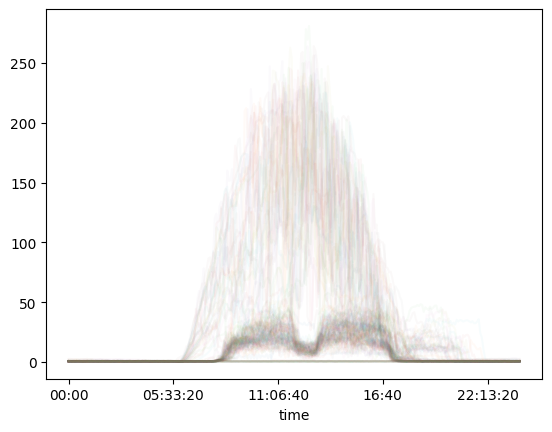

In [ ]:
plot_timeofday(kw, 'ACE_KW')

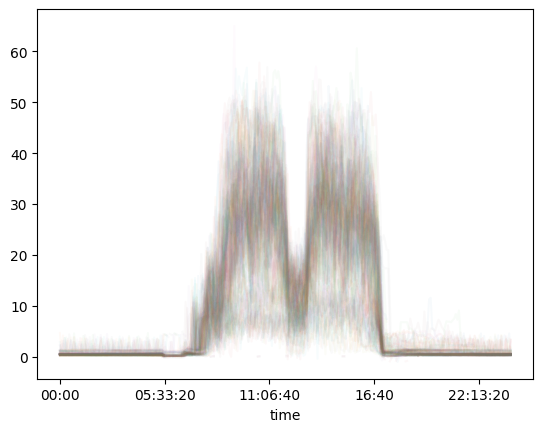

In [ ]:
plot_timeofday(kw, 'BP_KW')

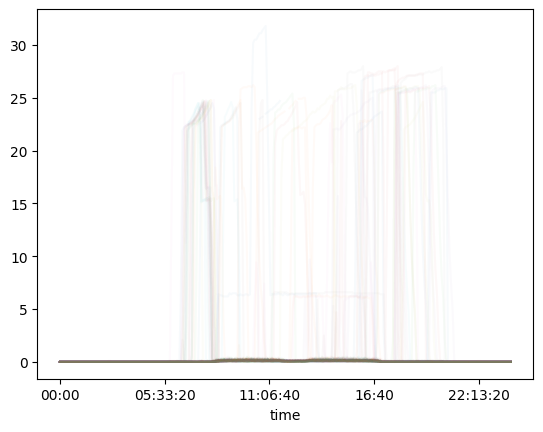

In [ ]:
plot_timeofday(kw, 'EV_KW')

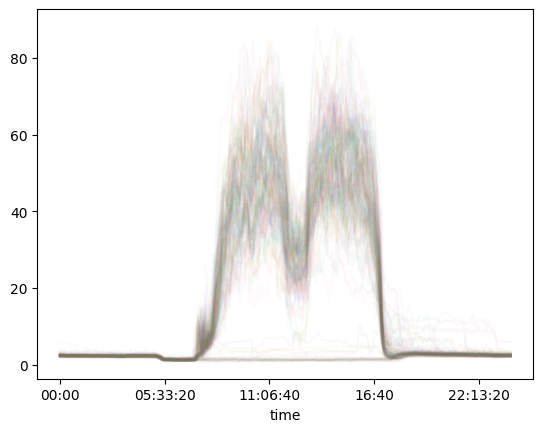

In [ ]:
plot_timeofday(kw, 'GS_KW')

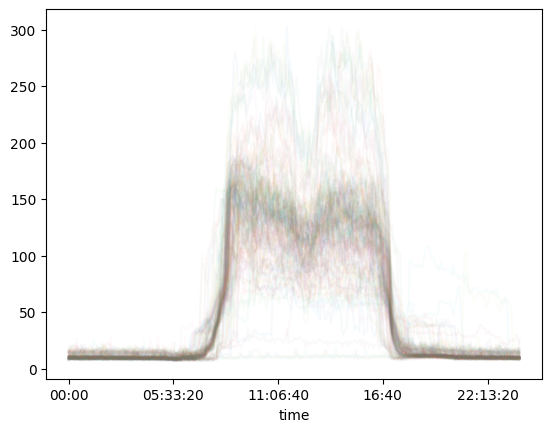

In [ ]:
plot_timeofday(kw, 'ShowRoomKW')

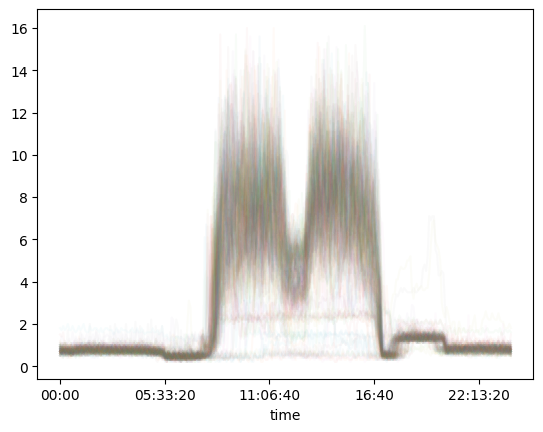

In [ ]:
plot_timeofday(kw, 'SURE_KW')

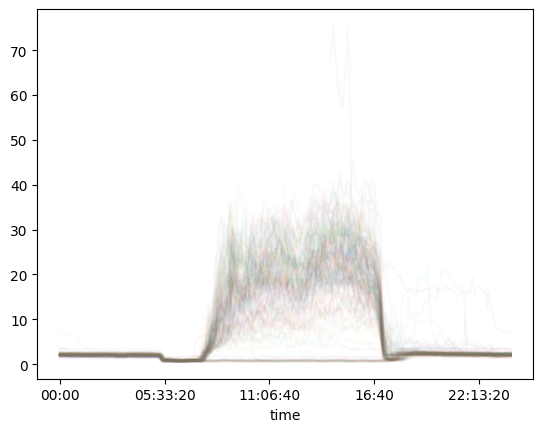

In [ ]:
plot_timeofday(kw, 'VM_KW')

In [ ]:
kw.dtypes

Timestamp     datetime64[ns]
ACE_KW               float64
BP_KW                float64
EV_KW                float64
GS_KW                float64
ShowRoomKW           float64
SURE_KW              float64
VM_KW                float64
weekday               object
dayofweek              int64
week                  UInt32
month                  int64
date                  object
time                  object
dtype: object

In [ ]:
def time(id):
  return kw.loc[id, 'time']
  #return kw.loc[id, 'Timestamp'].strftime('%H:%M:%S')

In [ ]:
def get_time_minmax(col_name):

  df = kw.groupby(kw.Timestamp.dt.date)[col_name].agg(['min','max', 'idxmin', 'idxmax']).reset_index().dropna()

  df['time_min'] = df['idxmin'].apply(time)
  df['time_max'] = df['idxmax'].apply(time)

  df['Timestamp'] = pd.to_datetime(df['Timestamp'])

  print('Average time of day with minimum kW: ', pd.to_timedelta(df['time_min'].astype(str)).mean())
  print('Average time of day with maximum kW: ', pd.to_timedelta(df['time_max'].astype(str)).mean())

  return df

In [ ]:
def plot_time_minmax(df):

  df['time_min'] = pd.to_datetime(df['time_min'], format='%H:%M:%S')
  df['time_max'] = pd.to_datetime(df['time_max'], format='%H:%M:%S')
  df['weekday'] = df['Timestamp'].dt.dayofweek

  fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing = 0.05)

  fig.add_trace(
      go.Scatter(x=df.time_max, y=df['max'], mode='markers', name='Max',
                marker=dict(color=df.weekday, opacity=0.4, showscale=True)),
      row=1, col=1
  )

  fig.add_trace(
      go.Scatter(x=df.time_min, y=df['min'], mode='markers', name='Min',
                marker=dict(color=df.weekday, opacity=0.5, showscale=True)),
      row=2, col=1
  )

  fig.update_layout(height=600, width=800, title_text='Energy Demand (kW)')
  fig.show()

# ACE

In [ ]:
ace_peak = get_time_minmax('ACE_KW')
ace_peak.describe()

Average time of day with minimum kW:  0 days 05:12:15.365853658
Average time of day with maximum kW:  0 days 11:56:55.243902439


,min,max,idxmin,idxmax
count,164.000000,164.000000,164.000000,164.000000
mean,0.292073,77.158537,22235.500000,22316.201220
std,0.071774,84.084947,13290.948817,13310.834937
min,0.000000,0.700000,53.000000,18.000000
25%,0.300000,32.225000,10724.000000,10640.250000
50%,0.300000,41.000000,22043.000000,22088.000000
75%,0.300000,60.225000,33710.250000,33821.750000
max,0.600000,281.100000,45351.000000,45361.000000


In [ ]:
ace_peak['month'] = ace_peak['Timestamp'].dt.month
ace_peak.loc[ace_peak.groupby('month')['max'].idxmax()].sort_values('Timestamp')

,Timestamp,min,max,idxmin,idxmax,time_min,time_max,month
5,2023-07-23,0.3,264.2,1321,1425,04:20:00,13:00:00,7
12,2023-08-09,0.2,281.1,3007,3088,06:00:00,12:45:00,8
35,2023-09-01,0.2,250.0,9334,9412,06:00:00,12:30:00,9
73,2023-10-18,0.3,61.5,19485,19619,00:05:00,11:15:00,10
87,2023-11-01,0.3,50.3,23513,23703,00:20:00,16:10:00,11
128,2023-12-12,0.3,53.3,35290,35429,00:15:00,11:50:00,12
156,2024-01-09,0.3,48.2,43347,43509,00:50:00,14:20:00,1


In [ ]:
plot_time_minmax(ace_peak)

# BP

In [ ]:
bp_peak = get_time_minmax('BP_KW')
bp_peak.describe()

Average time of day with minimum kW:  0 days 08:44:43.333333333
Average time of day with maximum kW:  0 days 11:51:27.037037037


,min,max,idxmin,idxmax
count,162.000000,162.000000,162.000000,162.000000
mean,0.156790,37.514198,22520.950617,22557.870370
std,0.232426,13.623458,13218.062089,13212.666507
min,-1.000000,0.500000,101.000000,15.000000
25%,0.100000,35.250000,10958.750000,11034.000000
50%,0.200000,40.300000,22278.500000,22345.000000
75%,0.300000,45.275000,33997.500000,33890.500000
max,0.800000,65.000000,45349.000000,45349.000000


In [ ]:
bp_peak['month'] = bp_peak['Timestamp'].dt.month
bp_peak.loc[bp_peak.groupby('month')['max'].idxmax()].sort_values('Timestamp')

,Timestamp,min,max,idxmin,idxmax,time_min,time_max,month
2,2023-07-20,0.2,60.6,472.0,594.0,05:35:00,15:45:00,7
18,2023-08-15,0.0,57.0,4729.0,4826.0,05:30:00,13:35:00,8
38,2023-09-06,-0.5,65.0,10138.0,10043.0,17:10:00,09:15:00,9
86,2023-10-31,0.2,52.4,23288.0,23408.0,05:35:00,15:35:00,10
87,2023-11-01,0.2,49.0,23576.0,23636.0,05:35:00,10:35:00,11
122,2023-12-06,0.2,45.3,33765.0,33691.0,17:10:00,11:00:00,12
152,2024-01-05,-1.0,45.2,42402.0,42380.0,17:55:00,16:05:00,1


In [ ]:
plot_time_minmax(bp_peak)

# EV

In [ ]:
ev_peak = get_time_minmax('EV_KW')
ev_peak.describe()

Average time of day with minimum kW:  0 days 00:31:05.853658536
Average time of day with maximum kW:  0 days 11:10:49.390243902


,min,max,idxmin,idxmax
count,164.0,164.000000,164.000000,164.00000
mean,0.0,8.985976,22179.621951,22307.02439
std,0.0,11.852451,13308.227640,13297.18810
min,0.0,0.000000,16.000000,74.00000
25%,0.0,0.200000,10545.750000,10615.75000
50%,0.0,0.400000,21928.500000,22051.00000
75%,0.0,24.600000,33637.750000,33759.50000
max,0.0,31.800000,45349.000000,45349.00000


In [ ]:
ev_peak['month'] = ev_peak['Timestamp'].dt.month
ev_peak.loc[ev_peak.groupby('month')['max'].idxmax()].sort_values('Timestamp')

,Timestamp,min,max,idxmin,idxmax,time_min,time_max,weekday,month
7,2023-07-25,0.0,26.3,1845,2030,1900-01-01,1900-01-01 15:25:00,1,7
33,2023-08-30,0.0,27.8,8686,8899,1900-01-01,1900-01-01 17:45:00,2,8
37,2023-09-05,0.0,28.0,9644,9837,1900-01-01,1900-01-01 16:05:00,1,9
76,2023-10-21,0.0,27.4,20348,20426,1900-01-01,1900-01-01 06:30:00,5,10
91,2023-11-05,0.0,25.0,24661,24813,1900-01-01,1900-01-01 12:55:00,6,11
143,2023-12-27,0.0,27.3,39600,39825,1900-01-01,1900-01-01 19:05:00,2,12
160,2024-01-13,0.0,31.8,44485,44616,1900-01-01,1900-01-01 10:55:00,5,1


In [ ]:
plot_time_minmax(ev_peak)

# GS

In [ ]:
gs_peak = get_time_minmax('GS_KW')
gs_peak.describe()

Average time of day with minimum kW:  0 days 06:59:23.414634146
Average time of day with maximum kW:  0 days 12:55:56.707317073


,min,max,idxmin,idxmax
count,164.000000,164.000000,164.000000,164.000000
mean,1.115854,53.078049,22256.926829,22328.274390
std,0.222352,24.914647,13310.651737,13321.316683
min,0.700000,2.400000,47.000000,1.000000
25%,1.000000,49.875000,10608.250000,10667.750000
50%,1.100000,59.450000,21993.000000,22081.500000
75%,1.200000,68.425000,33717.250000,33777.500000
max,2.200000,88.400000,45353.000000,45349.000000


In [ ]:
plot_time_minmax(gs_peak)

# SURE

In [ ]:
sure_peak = get_time_minmax('SURE_KW')
sure_peak.describe()

Average time of day with minimum kW:  0 days 07:20:27.439024390
Average time of day with maximum kW:  0 days 12:29:06.951219512


,min,max,idxmin,idxmax
count,164.000000,164.000000,164.000000,164.000000
mean,0.286585,11.028659,22261.304878,22322.628049
std,0.075555,3.930372,13303.912154,13317.833432
min,0.200000,0.900000,37.000000,13.000000
25%,0.200000,10.375000,10604.500000,10637.500000
50%,0.300000,12.000000,21997.000000,22104.500000
75%,0.300000,13.700000,33803.250000,33792.250000
max,0.500000,16.100000,45349.000000,45360.000000


In [ ]:
plot_time_minmax(sure_peak)

# Show Room

In [ ]:
showroom_peak = get_time_minmax('ShowRoomKW')
showroom_peak.describe()

Average time of day with minimum kW:  0 days 07:48:28.536585365
Average time of day with maximum kW:  0 days 10:35:53.048780487


,min,max,idxmin,idxmax
count,164.000000,164.000000,164.000000,164.000000
mean,7.767073,164.576829,22266.914634,22300.091463
std,1.531714,49.614603,13297.309575,13323.238630
min,5.900000,15.600000,109.000000,12.000000
25%,6.975000,145.975000,10618.750000,10621.750000
50%,7.350000,165.850000,21975.500000,22070.000000
75%,7.825000,183.075000,33682.500000,33758.250000
max,14.800000,303.200000,45349.000000,45354.000000


In [ ]:
plot_time_minmax(showroom_peak)

# VM

In [ ]:
vm_peak = get_time_minmax('VM_KW')
vm_peak.describe()

Average time of day with minimum kW:  0 days 06:50:23.780487804
Average time of day with maximum kW:  0 days 13:46:33.292682926


,min,max,idxmin,idxmax
count,164.000000,164.000000,164.000000,164.000000
mean,0.683537,25.344512,22255.146341,22338.347561
std,0.219391,12.106284,13308.662384,13322.425643
min,0.500000,2.100000,39.000000,3.000000
25%,0.600000,21.375000,10621.250000,10659.500000
50%,0.600000,27.900000,22005.000000,22088.500000
75%,0.700000,32.800000,33703.500000,33811.750000
max,1.900000,75.400000,45354.000000,45349.000000


In [ ]:
plot_time_minmax(vm_peak)